# Interaction Effects on Reaction Time Using ANOVA

## Question 1:

In this question, we will investigate the effects of stimulation type (electrical vs. magnetic) and brain region (frontal vs. parietal) on reaction time during a cognitive task. The dataset includes reaction time measurements taken across different combinations of stimulation type and brain region. Our objective is to determine whether both stimulation type and brain region have significant main effects on reaction times, using a two-way ANOVA.

Our approach to analyzing the data is structured as follows:

1. **Two-Way ANOVA:** We will conduct a two-way ANOVA to examine if there are significant differences in reaction times based on the combinations of stimulation type, brain region, and their interaction effects. This will help us understand how these factors influence reaction time performance.

2. **F-test:** Following the two-way ANOVA, we will use the F-test to assess whether the independent variables (stimulation type and brain region) and their interaction significantly affect reaction time. The F-test compares the explained variance from the factors and their interaction to the residual variance, with the p-value helping determine if the observed effects are statistically significant. This analysis will guide us in deciding whether to reject the null hypothesis, indicating a significant influence of the factors on reaction time.

By completing this exercise, we will gain deeper understanding of how to conduct a two-way ANOVA, interpret the results of the F-test, and evaluate the p-value to make an informed decision about whether to reject the null hypothesis. This analysis will allow us to determine whether there are significant main effects of the independent variables (stimulation type and brain region) on reaction times, as well as any potential interaction effects between them. Additionally, we will learn how to assess the magnitude of these effects, providing valuable insights into the cognitive processes underlying reaction time performance in response to different stimulation conditions.

## Q1 Solution:

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

We are using pandas to create the dataset based on the problem statement.

In [2]:
# Data setup
data = {
    'Stimulation': ['Electrical', 'Electrical', 'Electrical', 'Electrical', 'Electrical',
                    'Electrical', 'Electrical', 'Electrical', 'Electrical', 'Electrical',
                    'Magnetic', 'Magnetic', 'Magnetic', 'Magnetic', 'Magnetic',
                    'Magnetic', 'Magnetic', 'Magnetic', 'Magnetic', 'Magnetic'],
    'Region': ['Frontal', 'Frontal', 'Frontal', 'Frontal', 'Frontal',
               'Parietal', 'Parietal', 'Parietal', 'Parietal', 'Parietal',
               'Frontal', 'Frontal', 'Frontal', 'Frontal', 'Frontal',
               'Parietal', 'Parietal', 'Parietal', 'Parietal', 'Parietal'],
    'Reaction_Time': [250, 260, 245, 255, 250, 270, 280, 275, 290, 285,
                      240, 235, 245, 250, 240, 265, 270, 260, 275, 280]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [3]:
df

,Stimulation,Region,Reaction_Time
0,Electrical,Frontal,250
1,Electrical,Frontal,260
2,Electrical,Frontal,245
3,Electrical,Frontal,255
4,Electrical,Frontal,250
5,Electrical,Parietal,270
6,Electrical,Parietal,280
7,Electrical,Parietal,275
8,Electrical,Parietal,290
9,Electrical,Parietal,285


## Perform two way ANOVA

In [5]:
# Fit the Two-Way ANOVA model
model = ols('Reaction_Time ~ C(Stimulation) * C(Region)', data=df).fit()
# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

Display the ANOVA table

In [6]:
# Display the ANOVA table
print("ANOVA Table:")
print(anova_table)

ANOVA Table:
                                sum_sq    df             F        PR(>F)
C(Stimulation)            5.000000e+02   1.0  1.052632e+01  5.080221e-03
C(Region)                 3.920000e+03   1.0  8.252632e+01  1.026949e-07
C(Stimulation):C(Region)  1.236934e-26   1.0  2.604071e-28  1.000000e+00
Residual                  7.600000e+02  16.0           NaN           NaN


### ANOVA table explanation

1. sum_sq: Sum of Squares (SS) for each group (Between Groups), their interactions, and residuals (Within Groups).
2. df: Degrees of Freedom for each source $df_{simulation} = \alpha - 1 = 1$ (in this example,  $\alpha=2), $df_{region} = \beta - 1$ (in this example, $\beta = 2$), $df_{interaction} = (\alpha -1)(\beta - 1) = 1 \times 1 = 1$, $df_{error} = N - \alpha \beta = 20 - 2 \times 2 = 16$ (in this example N=20).
3. F: F-statistic for testing group differences.
4. PR(>F): p-value for the F-statistic.

You can find more details in the following link: [Statsmodels Example Formulas Documentation](https://www.statsmodels.org/dev/example_formulas.html)


## Interpret the results

In [10]:
f_stat_sim = anova_table["F"].iloc[0]
p_value_sim = anova_table["PR(>F)"].iloc[0]
f_stat_reg = anova_table['F'].iloc[1]
p_value_reg = anova_table['PR(>F)'].iloc[1]
f_stat_int = anova_table['F'].iloc[2]
p_value_int = anova_table['PR(>F)'].iloc[2]

print("\nResults:")
print(f"F-statistic (simulation): {f_stat_sim:.2f}, F-statistic (region): {f_stat_reg:.2f}, F-statistic (interaction): {f_stat_int:.2f}")
print(f"p-value (simulation): {p_value_sim:.8f}, p-value (region): {p_value_reg:.8f}, p-value (interaction): {p_value_int:.8f}")


Results:
F-statistic (simulation): 10.53, F-statistic (region): 82.53, F-statistic (interaction): 0.00
p-value (simulation): 0.00508022, p-value (region): 0.00000010, p-value (interaction): 1.00000000


The F-statistic shows the ratio of variance explained by the group differences to the unexplained variance, while the p-value indicates if the group differences are statistically significant (p < 0.01).

* **Main Effects:** Both Stimulation Type and Brain Region have a significant main effect on reaction times at the 1% significance level
* **Interaction Effect:** The interaction between Stimulation Type and Brain Region is not significant at the 1% significance level

In conclusion, both Stimulation Type and Brain Region independently affect reaction times, but their interaction does not have a significant impact at the 1% significance level.

# Question 2:

In this exercise, we will investigate the effects of stimulation type (electrical vs. magnetic), brain region (frontal vs. parietal VS. occipital), and cognitive load (low vs. high) on reaction time during a cognitive task. The dataset includes reaction time measurements taken across different combinations of stimulation type, brain region, and cognitive load. Our objective is to determine whether stimulation type, brain region and cognitive load have significant main effects on reaction times, using a factorial ANOVA.

Our approach to analyzing the data is structured as follows:

1. **Factorial ANOVA:** We will conduct a factorial ANOVA to examine if there are significant differences in reaction times based on the combinations of stimulation type, brain region, cognitive load, and their interaction effects. This will help us understand how these factors influence reaction time performance.

2. **F-test:** Following the factorial ANOVA, we will use the F-test to assess whether the independent variables (stimulation type and brain region) and their interaction significantly affect reaction time. The F-test compares the explained variance from the factors and their interaction to the residual variance, with the p-value helping determine if the observed effects are statistically significant. This analysis will guide us in deciding whether to reject the null hypothesis, indicating a significant influence of the factors on reaction time.

By completing this exercise, we will gain deeper understanding of how to conduct a factorial ANOVA, interpret the results of the F-test, and evaluate the p-value to make an informed decision about whether to reject the null hypothesis. This analysis will allow us to determine whether there are significant main effects of the independent variables on reaction times, as well as any potential interaction effects between them. Additionally, we will learn how to assess the magnitude of these effects, providing valuable insights into the cognitive processes underlying reaction time performance in response to different stimulation conditions.

## Q2 Solution:

In [11]:
# Original compact data
data = [
    ("Electrical", "Frontal", "Low", [250, 255, 245, 250, 255]),
    ("Electrical", "Frontal", "High", [270, 265, 275, 280, 260]),
    ("Electrical", "Parietal", "Low", [270, 275, 265, 285, 280]),
    ("Electrical", "Parietal", "High", [290, 280, 275, 300, 285]),
    ("Electrical", "Occipital", "Low", [246, 235, 245, 230, 240]),
    ("Electrical", "Occipital", "High", [260, 255, 250, 270, 265]),
    ("Magnetic", "Frontal", "Low", [243, 235, 245, 250, 240]),
    ("Magnetic", "Frontal", "High", [260, 255, 270, 265, 255]),
    ("Magnetic", "Parietal", "Low", [255, 260, 265, 270, 260]),
    ("Magnetic", "Parietal", "High", [276, 270, 265, 280, 275]),
    ("Magnetic", "Occipital", "Low", [224, 215, 225, 210, 220]),
    ("Magnetic", "Occipital", "High", [242, 235, 250, 245, 240]),
]


# Expand the data programmatically
expanded_data = []
for sim_type, brain_region, cog_load, reaction_times in data:
    for rt in reaction_times:
        expanded_data.append((sim_type, brain_region, cog_load, rt))

# Create a DataFrame
columns = ["Stimulation_Type", "Brain_Region", "Cognitive_Load", "Reaction_Time"]
df = pd.DataFrame(expanded_data, columns=columns)


## Plot the data

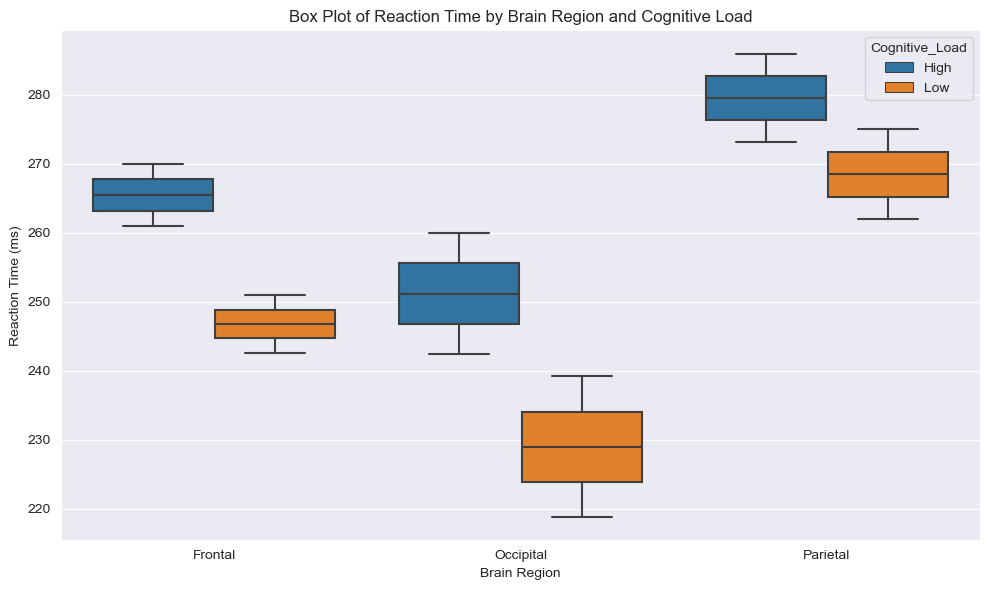

In [17]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Brain_Region", y="Reaction_Time", hue="Cognitive_Load")

# Add labels and title
plt.title("Box Plot of Reaction Time by Brain Region and Cognitive Load")
plt.xlabel("Brain Region")
plt.ylabel("Reaction Time (ms)")

# Show the plot
plt.tight_layout()
plt.show()

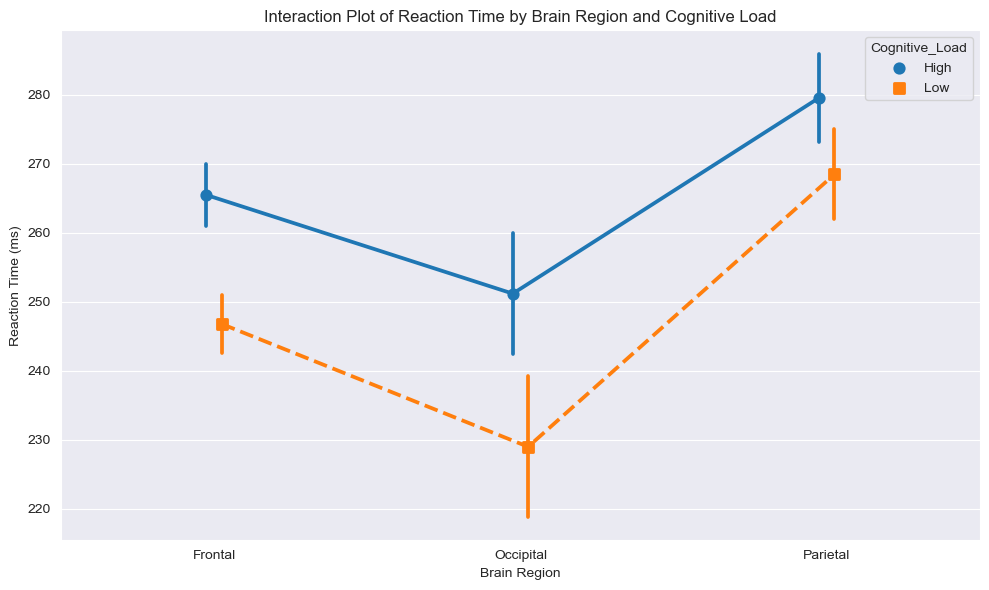

In [18]:
# Create the interaction plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x="Brain_Region", y="Reaction_Time", hue="Cognitive_Load",
              dodge=True, markers=["o", "s"], linestyles=["-", "--"])

# Add labels and title
plt.title("Interaction Plot of Reaction Time by Brain Region and Cognitive Load")
plt.xlabel("Brain Region")
plt.ylabel("Reaction Time (ms)")

# Show the plot
plt.tight_layout()
plt.show()

## Perform factorial ANOVA

In [139]:
# Fit the ANOVA model
model = ols('Reaction_Time ~ C(Stimulation_Type) * C(Brain_Region) * C(Cognitive_Load)', data=df).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

Display the ANOVA table

In [140]:
# Display the ANOVA table
print("ANOVA Table:")
print(anova_results)

ANOVA Table:
                                                         sum_sq    df  \
C(Stimulation_Type)                                 1530.305246   1.0   
C(Brain_Region)                                     6120.408333   2.0   
C(Cognitive_Load)                                   2546.055246   1.0   
C(Stimulation_Type):C(Brain_Region)                  563.167629   2.0   
C(Stimulation_Type):C(Cognitive_Load)                142.424067   1.0   
C(Brain_Region):C(Cognitive_Load)                    827.916720   2.0   
C(Stimulation_Type):C(Brain_Region):C(Cognitive...   127.906311   2.0   
Residual                                            3906.800000  49.0   

                                                            F        PR(>F)  
C(Stimulation_Type)                                 19.193447  6.214902e-05  
C(Brain_Region)                                     38.381797  9.347769e-11  
C(Cognitive_Load)                                   31.933221  8.035791e-07  
C(Stimulation_Typ

## Interpret the results

1. Main effects:
    * Stimulation type `(C(Stimulation_Type))`: F = 19.19, p = 6.21e-05 (less than 0.05): This is statistically significant. This means the type of stimulation (whether electrical or magnetic) has a significant effect on the dependent variable (reaction time)
    * Brain Region `(C(Brain_Region))`: F = 38.38, p = 9.35e-11 (much less than 0.05): This is also statistically significant. The region of the brain (Frontal, Parietal, or Occipital) significantly affects the reaction times
    * Cognitive Load `(C(Cognitive_Load))`: F = 31.93, p = 8.04e-07 (less than 0.05): This is statistically significant. Cognitive load (Low vs High) has a significant impact on the reaction times

2. Interaction effects:
    * Stimulation Type × Brain Region `(C(Stimulation_Type):C(Brain_Region))`: F = 3.53, p = 0.0369 (less than 0.05): This is statistically significant. There is a significant interaction between stimulation type and brain region. This suggests that the effect of the simulation type (Electrical vs Magnetic) on reaction times is influenced by the brain region
    * Stimulation Type × Cognitive Load `(C(Stimulation_Type):C(Cognitive_Load))`: F = 1.79, p = 0.1875 (greater than 0.05): This is not statistically significant. There is no significant interaction between stimulation type and cognitive load, meaning that the effect of stimulation type on reaction times does not depend on cognitive load
    * Brain Region × Cognitive Load `(C(Brain_Region):C(Cognitive_Load))`: F = 5.19, p = 0.0090 (less than 0.05): This is statistically significant. The interaction between brain region and cognitive load has a significant effect on reaction times. This suggests that the brain region's effect on reaction times depends on the cognitive load
    * Stimulation Type × Brain Region × Cognitive Load `(C(Stimulation_Type):C(Brain_Region):C(Cognitive_Load))`: F = 0.80, p = 0.4542 (greater than 0.05): This is not statistically significant. There is no significant three-way interaction between stimulation type, brain region, and cognitive load

3. Residuals:
    * The residual sum of squares is 3906.80, with 49 degrees of freedom, which reflects the unexplained variability in the model


### Summary of findings

The analysis revealed that **stimulation type**, **brain region**, and **cognitive load** all significantly affect reaction times. Additionally, there are significant interactions between **stimulation type** and **brain region**, and between **brain region and cognitive load**. However, no significant interaction was found between **stimulation type and cognitive load**, nor was there a significant three-way interaction involving stimulation type, brain region, and cognitive load. These findings suggest that reaction times are influenced by the type of stimulation, the brain region, and the cognitive load, with some interactions depending on specific factors.
